# Importing all necessary libraries

In [1]:
#pip install matplotlib

In [2]:
#pip install seaborn

In [3]:
#pip install scikit-learn


In [4]:
#pip install wrapt


In [6]:
#pip install numpy

In [8]:
#pip install pandas

In [12]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Survival analysis
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data cleaning process

In [33]:
# Loading the dataset
data = pd.read_csv("Breast Cancer.csv")

In [34]:
# Displaying the first five rows of the dataset
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [35]:
# Displaying missing values from each column
data.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [36]:
# Check percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

Patient ID                         0.000000
Age at Diagnosis                   0.438422
Type of Breast Surgery            22.080510
Cancer Type                        0.000000
Cancer Type Detailed               0.000000
Cellularity                       23.595058
Chemotherapy                      21.084097
Pam50 + Claudin-low subtype       21.084097
Cohort                             0.438422
ER status measured by IHC          3.308091
ER Status                          1.594261
Neoplasm Histologic Grade          4.822639
HER2 status measured by SNP6      21.084097
HER2 Status                       21.084097
Tumor Other Histologic Subtype     5.380630
Hormone Therapy                   21.084097
Inferred Menopausal State         21.084097
Integrative Cluster               21.084097
Primary Tumor Laterality          25.468314
Lymph nodes examined positive     10.601833
Mutation Count                     6.058191
Nottingham prognostic index        8.848147
Oncotree Code                   

In [37]:
# Filling numerical columns with median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Filling categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Check the cleaned dataset
print(data.isnull().sum())

# Now all the missing values are filled

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

In [38]:
# Checking the columns data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     2509 non-null   object 
 6   Chemotherapy                    2509 non-null   object 
 7   Pam50 + Claudin-low subtype     2509 non-null   object 
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   object 
 10  ER Status                       2509 non-null   object 
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status measured by SNP6    25

In [39]:
# List of columns to one-hot encode (all the object type columns)
categorical_columns = ['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 
                       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 
                       'ER status measured by IHC', 'ER Status', 'HER2 status measured by SNP6', 
                       'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 
                       'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 
                       'Overall Survival Status', 'PR Status', 'Radio Therapy', 
                       'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 
                       'Patient\'s Vital Status']

# Apply pd.get_dummies() to one-hot encode these columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# The 'drop_first=True' argument drops the first level of each category to avoid multicollinearity

In [40]:
# Drop a specific column without affecting others
data = data.drop(columns=['Patient ID','Oncotree Code'])

# Verify the columns
print(data.columns)

Index(['Age at Diagnosis', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage',
       'Type of Breast Surgery_Mastectomy', 'Cancer Type_Breast Sarcoma',
       'Cancer Type Detailed_Breast Angiosarcoma',
       'Cancer Type Detailed_Breast Invasive Ductal Carcinoma',
       'Cancer Type Detailed_Breast Invasive Lobular Carcinoma',
       'Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma',
       'Cancer Type Detailed_Invasive Breast Carcinoma',
       'Cancer Type Detailed_Metaplastic Breast Cancer', 'Cellularity_Low',
       'Cellularity_Moderate', 'Chemotherapy_Yes',
       'Pam50 + Claudin-low subtype_Her2', 'Pam50 + Claudin-low subtype_LumA',
       'Pam50 + Claudin-low subtype_LumB', 'Pam50 + Claudin-low subtype_NC',
       'Pam5

In [41]:
# Check the clean
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 70 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age at Diagnosis                                                2509 non-null   float64
 1   Neoplasm Histologic Grade                                       2509 non-null   float64
 2   Lymph nodes examined positive                                   2509 non-null   float64
 3   Mutation Count                                                  2509 non-null   float64
 4   Nottingham prognostic index                                     2509 non-null   float64
 5   Overall Survival (Months)                                       2509 non-null   float64
 6   Relapse Free Status (Months)                                    2509 non-null   float64
 7   Tumor Size                                         

# Exploratory Data Analysis (EDA)

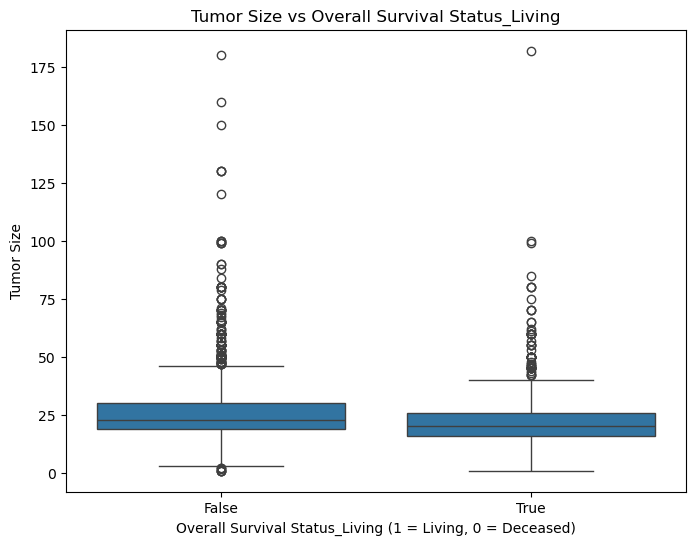

In [22]:
# Tumor Size vs Overall Survival Status

# Set the figure size to 8x6 inches for better readability of the plot.
plt.figure(figsize=(8, 6))

# Create a boxplot to visualize the distribution of 'Tumor Size' against 'Overall Survival Status_Living'.
# The boxplot shows the central tendency and spread (quartiles) of 'Tumor Size' for each survival status group.
sns.boxplot(x='Overall Survival Status_Living', y='Tumor Size', data=data)

# Add a title to the plot for clarity on what the visualization represents.
plt.title('Tumor Size vs Overall Survival Status_Living')

# Label the x-axis with a more descriptive term to specify that "1" represents "Living" and "0" represents "Deceased".
plt.xlabel('Overall Survival Status_Living (1 = Living, 0 = Deceased)')

# Label the y-axis to indicate that it represents 'Tumor Size', the variable being analyzed.
plt.ylabel('Tumor Size')

# Display the plot.
plt.show()

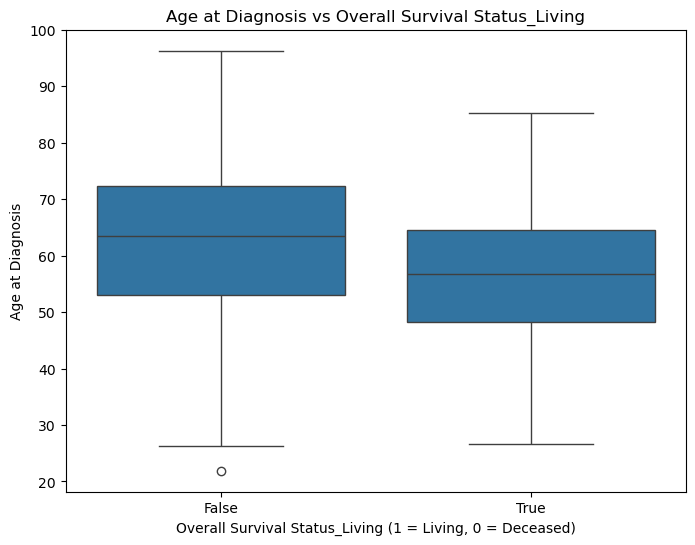

In [23]:
# Age at Diagnosis vs Overall Survival Status

# Set the figure size to 8x6 inches to make the plot visually clear and readable.
plt.figure(figsize=(8, 6))

# Create a boxplot to visualize the distribution of 'Age at Diagnosis' against 'Overall Survival Status_Living'.
# This boxplot shows the central tendency and spread (quartiles) of 'Age at Diagnosis' for each group (Living or Deceased).
sns.boxplot(x='Overall Survival Status_Living', y='Age at Diagnosis', data=data)

# Add a title to provide context on what the plot represents, showing the relationship between age at diagnosis and survival status.
plt.title('Age at Diagnosis vs Overall Survival Status_Living')

# Label the x-axis, clarifying that "1" indicates "Living" and "0" indicates "Deceased".
plt.xlabel('Overall Survival Status_Living (1 = Living, 0 = Deceased)')

# Label the y-axis to indicate it represents 'Age at Diagnosis', which is the feature being analyzed.
plt.ylabel('Age at Diagnosis')

# Render the plot on the screen.
plt.show()

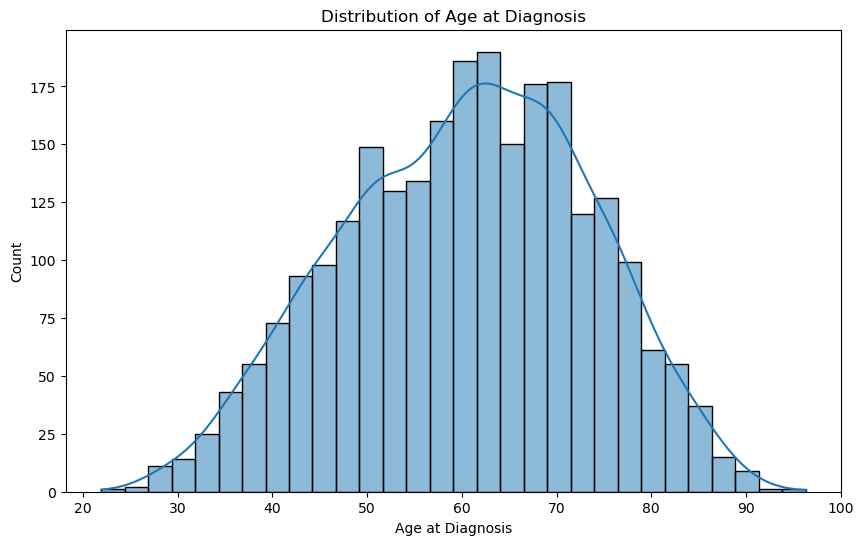

In [24]:
# Age at Diagnosis

# Set the figure size to 10x6 inches to make the histogram more visually clear and easy to interpret.
plt.figure(figsize=(10, 6))

# Create a histogram to display the distribution of 'Age at Diagnosis'.
# The `kde=True` parameter overlays a Kernel Density Estimate (KDE) curve to show the smoothed probability density.
# The `bins=30` parameter specifies that the data should be divided into 30 bins for the histogram.
sns.histplot(data['Age at Diagnosis'], kde=True, bins=30)

# Add a title to the histogram to indicate that it represents the distribution of 'Age at Diagnosis'.
plt.title('Distribution of Age at Diagnosis')

# Display the plot.
plt.show()

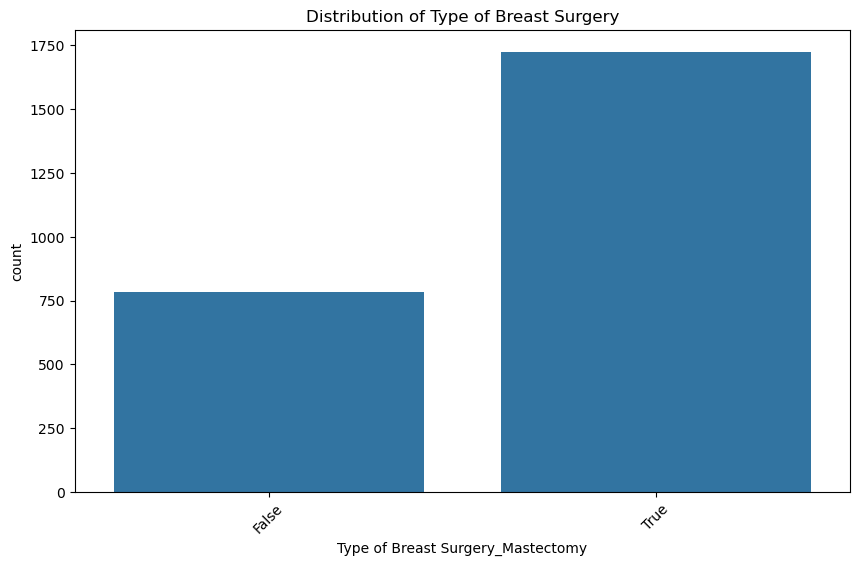

In [25]:
# Type of Breast Surgery

# Set the figure size to 10x6 inches to make the plot more visually clear and readable.
plt.figure(figsize=(10, 6))

# Create a count plot to visualize the frequency of each category in 'Type of Breast Surgery_Mastectomy'.
# The count plot shows how many patients had each type of surgery (e.g., Mastectomy).
sns.countplot(x='Type of Breast Surgery_Mastectomy', data=data)

# Add a title to the plot to clarify it represents the distribution of breast surgery types among patients.
plt.title('Distribution of Type of Breast Surgery')

# Rotate x-axis labels by 45 degrees to make them easier to read, especially if there are long category names.
plt.xticks(rotation=45)

# Display the plot.
plt.show()

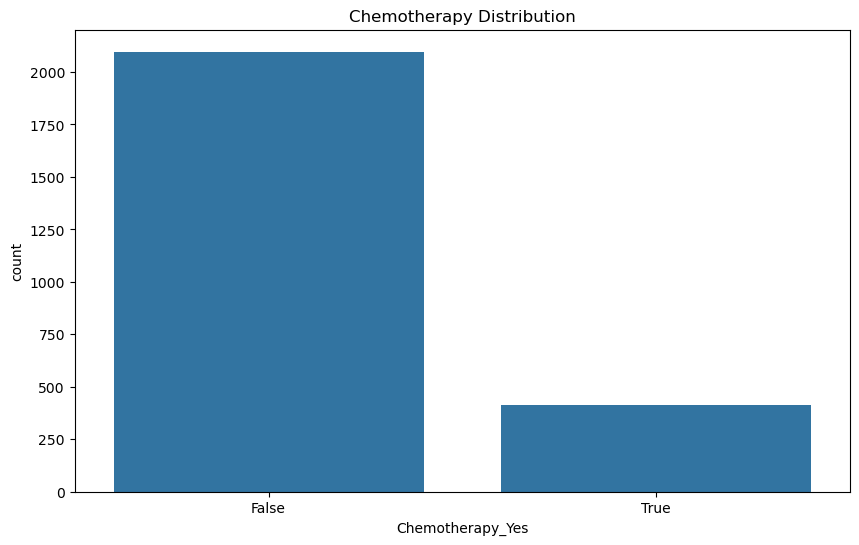

In [26]:
# Chemotherapy Treatment Distribution Among Patients

# Set the figure size to 10x6 inches to make the plot visually clear and easy to interpret.
plt.figure(figsize=(10, 6))

# Create a count plot to show the distribution of the 'Chemotherapy_Yes' variable.
# This plot will display the frequency of patients who received chemotherapy (e.g., 'Yes' or 'No').
sns.countplot(x='Chemotherapy_Yes', data=data)

# Add a title to the plot to indicate it represents the distribution of chemotherapy status among patients.
plt.title('Chemotherapy Distribution')

# Display the plot.
plt.show()

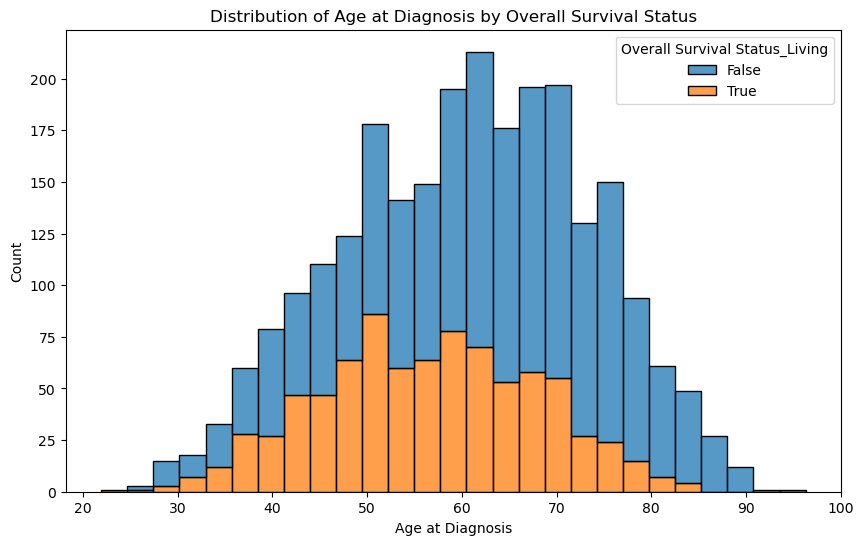

In [27]:
# Visualizing the distribution of 'Age at Diagnosis' by 'Overall Survival Status'

# Set the figure size to 10x6 inches to make the plot visually clear and readable.
plt.figure(figsize=(10, 6))

# Create a histogram to display the distribution of 'Age at Diagnosis' with respect to 'Overall Survival Status_Living'.
# The 'hue' parameter separates the data by survival status (e.g., Living or Deceased), creating a comparison within the histogram.
# The 'multiple="stack"' parameter stacks the bars for each survival status category, making it easy to see their distribution.
sns.histplot(data=data, x='Age at Diagnosis', hue='Overall Survival Status_Living', multiple='stack')

# Add a title to indicate the plot represents the distribution of 'Age at Diagnosis' by survival status.
plt.title("Distribution of Age at Diagnosis by Overall Survival Status")

# Display the plot.
plt.show()

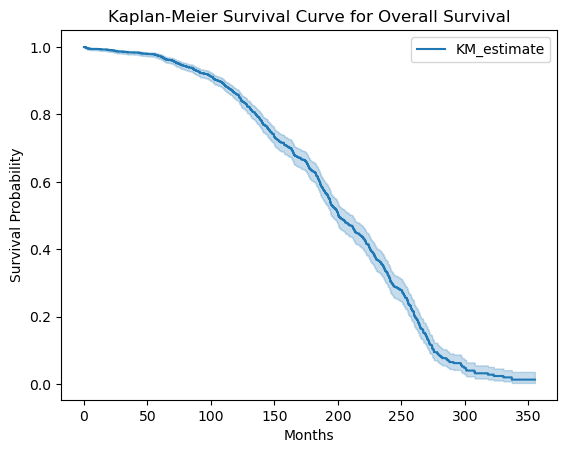

In [28]:
# Kaplan-Meier Survival Analysis of Overall Survival in Breast Cancer Patients

# Import the Kaplan-Meier Fitter from the lifelines library for survival analysis.
from lifelines import KaplanMeierFitter

# Initialize an instance of KaplanMeierFitter, which will be used to fit the survival data.
kmf = KaplanMeierFitter()

# Define the time and event variables.
# 'T' represents the duration (e.g., overall survival time in months).
T = data['Overall Survival (Months)']  # Duration in months
# 'E' represents the event indicator (1 = event observed, 0 = censored, e.g., survival status).
E = data['Overall Survival Status_Living']  # Survival event observed or censored

# Fit the Kaplan-Meier model using the time ('T') and event ('E') data.
kmf.fit(T, event_observed=E)

# Plot the survival function based on the fitted model.
kmf.plot_survival_function()

# Add a title to describe the plot as a Kaplan-Meier survival curve for overall survival.
plt.title("Kaplan-Meier Survival Curve for Overall Survival")

# Label the x-axis to indicate the survival duration in months.
plt.xlabel("Months")

# Label the y-axis to indicate the probability of survival.
plt.ylabel("Survival Probability")

# Display the plot.
plt.show()

<lifelines.CoxPHFitter: fitted with 2509 total observations, 1672 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status_Living'
      baseline estimation = breslow
   number of observations = 2509
number of events observed = 837
   partial log-likelihood = -5281.86
         time fit was run = 2024-10-30 11:46:43 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
Age at Diagnosis  -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
Tumor Size         0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01

                   cmp to     z      p   -log2(p)
covariate                                        
Age at Diagnosis     0.00 -3.07 <0.005       8.89
Tumor Size           0.00  0.09   0.93       0.10
---
Concordance = 0.53
Partial AIC = 10567.72
log-likelihood ratio test = 9.40 on 2 df
-log2(p) of ll-ratio test = 6.78

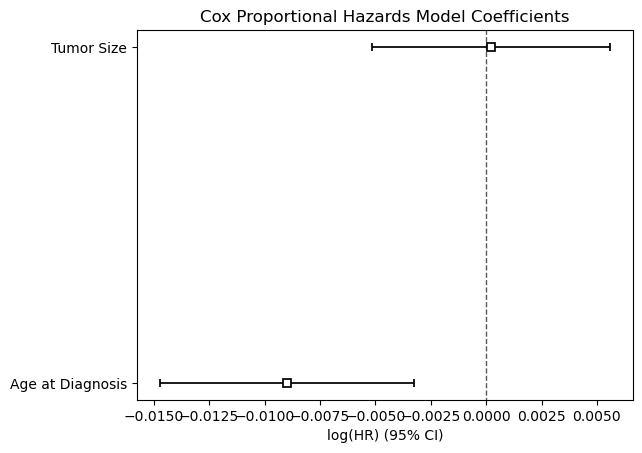

In [29]:
# Cox Proportional Hazards Model for Assessing Survival Risk Factors in Breast Cancer

# Import the Cox Proportional Hazards Fitter from the lifelines library for survival analysis.
from lifelines import CoxPHFitter

# Prepare the dataset by selecting relevant features for the Cox model.
# Ensure the dataset is clean and any missing values are handled.
# Here, we're using 'Age at Diagnosis' and 'Tumor Size' as predictors.
features = ['Age at Diagnosis', 'Tumor Size']  # Adjust based on your dataset

# Create a new DataFrame that includes the selected features and survival data, removing any rows with missing values.
data = data[features + ['Overall Survival (Months)', 'Overall Survival Status_Living']].dropna()

# Initialize the Cox Proportional Hazards model.
cph = CoxPHFitter()

# Fit the model to the data, specifying the duration and event columns.
cph.fit(data, duration_col='Overall Survival (Months)', event_col='Overall Survival Status_Living')

# Display a summary of the Cox model, which includes coefficients, p-values, and other statistics.
cph.print_summary()

# Plot the coefficients of the Cox model to visualize their effect sizes.
cph.plot()

# Add a title to the plot for clarity.
plt.title("Cox Proportional Hazards Model Coefficients")

# Display the plot.
plt.show()

In [30]:
# Compute the correlation matrix for the DataFrame 'data'.

# This will calculate the pairwise correlation coefficients between numerical features.
corr_matrix = data.corr()

# Print the correlation matrix to the console for inspection.
print(corr_matrix)

                                Age at Diagnosis  Tumor Size  \
Age at Diagnosis                        1.000000    0.066093   
Tumor Size                              0.066093    1.000000   
Overall Survival (Months)              -0.123599   -0.168743   
Overall Survival Status_Living         -0.213544   -0.125724   

                                Overall Survival (Months)  \
Age at Diagnosis                                -0.123599   
Tumor Size                                      -0.168743   
Overall Survival (Months)                        1.000000   
Overall Survival Status_Living                   0.373526   

                                Overall Survival Status_Living  
Age at Diagnosis                                     -0.213544  
Tumor Size                                           -0.125724  
Overall Survival (Months)                             0.373526  
Overall Survival Status_Living                        1.000000  


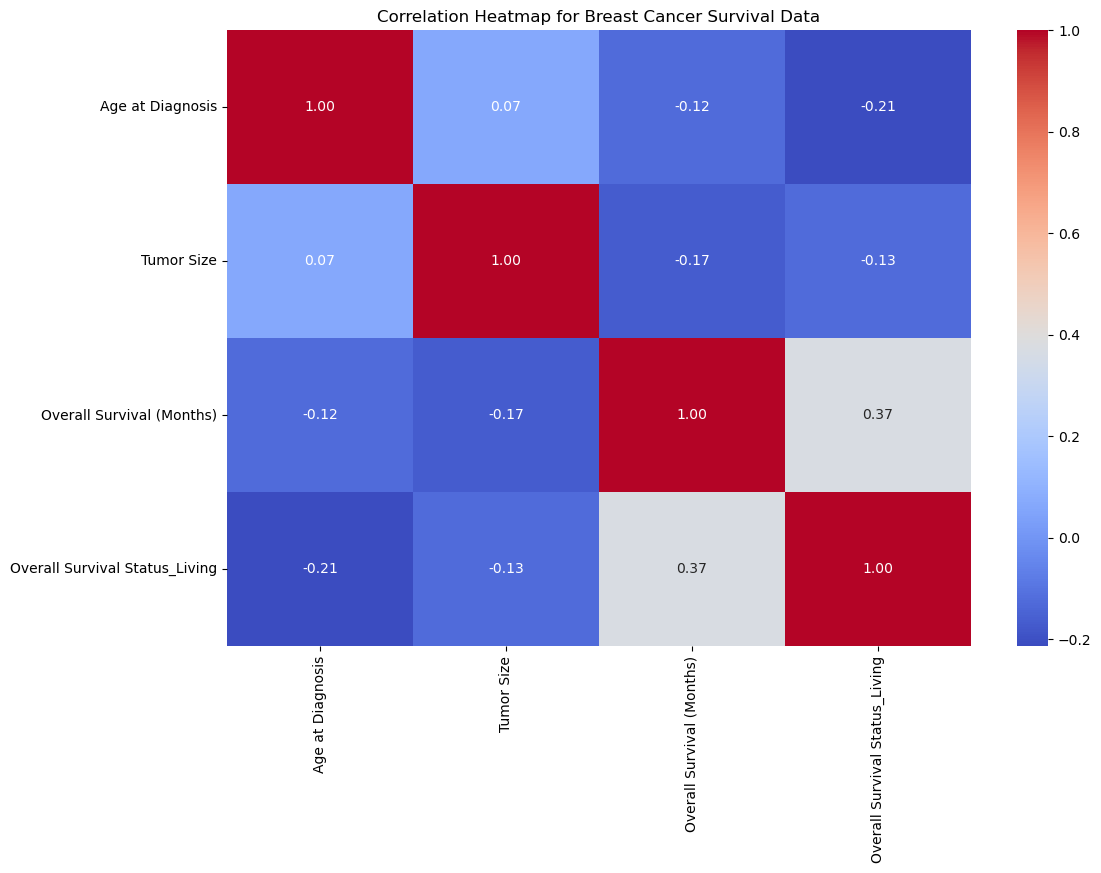

In [31]:
# Create the heatmap for the correlation matrix

# Set the figure size to 12x8 inches for better visibility of the heatmap.
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix.
# - `annot=True` adds the correlation coefficient values to each cell in the heatmap.
# - `cmap='coolwarm'` sets the color palette for the heatmap, where colors represent different correlation strengths.
# - `fmt='.2f'` formats the annotation text to show two decimal places.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to describe what the heatmap represents.
plt.title('Correlation Heatmap for Breast Cancer Survival Data')

# Display the heatmap.
plt.show()

# Model Validation

In [42]:
# Selecting features (X) by dropping the target variable
# In this case, we are dropping 'Patient's Vital Status_Living' and 'Overall Survival Status_Living' from the feature set.
X = data.drop(columns=["Patient's Vital Status_Living", "Overall Survival Status_Living"])

# Selecting the target variable (y), which is the 'Patient's Vital Status_Living' column.
y = data["Patient's Vital Status_Living"]

In [43]:
# Split the dataset into training and testing sets.
# - X_train: Features for the training set
# - X_test: Features for the testing set
# - y_train: Target variable for the training set
# - y_test: Target variable for the testing set
# The test_size parameter specifies the proportion of the dataset to include in the test split (30% in this case).
# random_state is set to ensure reproducibility of the split (the same split will occur each time the code is run).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Initialize the StandardScaler.
scaler = StandardScaler()

# Fit the scaler to the training data and transform it.
X_train_scaled = scaler.fit_transform(X_train)

# This ensures that the test set is scaled consistently with the training set.
X_test_scaled = scaler.transform(X_test)

# Model Building

## Model 1: Logistic Regression

In [45]:
# Initialize the Logistic Regression model.
model1 = LogisticRegression()

# Fit the model to the training data (X_train and y_train).
# This trains the model using the features (X_train) to predict the target variable (y_train).
model1.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Use the trained logistic regression model to make predictions on the test set.
# X_test contains the features for which we want to predict the target variable (y).
y_test_pred = model1.predict(X_test)

In [47]:
# Generate and print a classification report to evaluate the model's performance.
# The report includes metrics such as precision, recall, F1-score, and support for each class.
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.93       353
        True       0.94      0.94      0.94       400

    accuracy                           0.94       753
   macro avg       0.94      0.94      0.94       753
weighted avg       0.94      0.94      0.94       753



In [48]:
# Calculate the ROC AUC score to evaluate the performance of the model.
# y_test contains the true labels, and y_test_pred contains the predicted labels.
roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the ROC AUC score.
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9385056657223796


In [49]:
# Calculate the confusion matrix to evaluate the model's predictions.
# y_test contains the true labels, and y_test_pred contains the predicted labels.
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix.
print(conf_matrix)

[[329  24]
 [ 22 378]]


## Model 2: Decision Tree Classifier

In [50]:
# Initialize the Decision Tree Classifier.
dtc = DecisionTreeClassifier()

# Fit the decision tree classifier to the training data (X_train and y_train).
# This trains the model using the features (X_train) to predict the target variable (y_train).
model2 = dtc.fit(X_train, y_train)

In [51]:
# Use the trained decision tree classifier to make predictions on the test set.
# X_test contains the features for which we want to predict the target variable (y).
y_test_pred = model2.predict(X_test)

In [52]:
# Generate and print a classification report to evaluate the model's performance.
# The report includes metrics such as precision, recall, F1-score, and support for each class.
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95       353
        True       0.96      0.96      0.96       400

    accuracy                           0.96       753
   macro avg       0.96      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



## Model 3: Random Forest Classifier

In [53]:
# Initialize the Random Forest Classifier.
rfc = RandomForestClassifier()

# Fit the random forest classifier to the training data (X_train and y_train).
# This trains the model using the features (X_train) to predict the target variable (y_train).
model3 = rfc.fit(X_train, y_train)

# Use the trained random forest classifier to make predictions on the test set.
# X_test contains the features for which we want to predict the target variable (y).
y_test_pred2 = model3.predict(X_test)

In [54]:
# Generate and print a classification report to evaluate the model's performance.
# The report includes metrics such as precision, recall, F1-score, and support for each class.
print(metrics.classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

       False       0.94      0.97      0.96       353
        True       0.97      0.95      0.96       400

    accuracy                           0.96       753
   macro avg       0.96      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



## Model 4: Gradient Boosting Classifier

In [55]:
# Initialize the Gradient Boosting Classifier.
gbc = GradientBoostingClassifier()

# Fit the gradient boosting classifier to the training data (X_train and y_train).
# This trains the model using the features (X_train) to predict the target variable (y_train).
model4 = gbc.fit(X_train, y_train)

# Use the trained gradient boosting classifier to make predictions on the test set.
# X_test contains the features for which we want to predict the target variable (y).
y_test_pred3 = model4.predict(X_test)

In [56]:
# Generate and print a classification report to evaluate the model's performance.
# The report includes metrics such as precision, recall, F1-score, and support for each class.
print(metrics.classification_report(y_test ,y_test_pred3))

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       353
        True       0.97      0.98      0.98       400

    accuracy                           0.97       753
   macro avg       0.97      0.97      0.97       753
weighted avg       0.97      0.97      0.97       753



## Model 5: Support Vector Machine (SVM)

In [57]:
# Initialize the Support Vector Classifier with a linear kernel.
svc = SVC(kernel="linear")

# Fit the support vector classifier to the training data (X_train and y_train).
# This trains the model using the features (X_train) to predict the target variable (y_train).
model5 = svc.fit(X_train, y_train)

# Use the trained support vector classifier to make predictions on the test set.
# X_test contains the features for which we want to predict the target variable (y).
y_test_pred = model5.predict(X_test)

In [58]:
# Generate and print a classification report to evaluate the model's performance.
# The report includes metrics such as precision, recall, F1-score, and support for each class.
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       353
        True       0.97      0.96      0.97       400

    accuracy                           0.96       753
   macro avg       0.96      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



## Model 6: K-Nearest Neighbors Classifier (KNN)

In [59]:
# Initialize the K-Nearest Neighbors Classifier with k=1 (one nearest neighbor).
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the KNN classifier to the training data (X_train and y_train).
# This trains the model using the features (X_train) to predict the target variable (y_train).
model6 = knn.fit(X_train, y_train)

# Use the trained KNN classifier to make predictions on the test set.
# X_test contains the features for which we want to predict the target variable (y).
y_test_pred = model6.predict(X_test)

In [60]:
# Generate and print a classification report to evaluate the model's performance.
# The report includes metrics such as precision, recall, F1-score, and support for each class.
print(classification_report(y_test ,y_test_pred))

              precision    recall  f1-score   support

       False       0.73      0.71      0.72       353
        True       0.75      0.77      0.76       400

    accuracy                           0.74       753
   macro avg       0.74      0.74      0.74       753
weighted avg       0.74      0.74      0.74       753



In [61]:
#pip install streamlit


In [62]:
import joblib
import sklearn

print("joblib version:", joblib.__version__)
print("scikit-learn version:", sklearn.__version__)


joblib version: 1.4.2
scikit-learn version: 1.5.2


In [63]:
!pip uninstall joblib -y
!pip install joblib


Found existing installation: joblib 1.4.2
Uninstalling joblib-1.4.2:
  Successfully uninstalled joblib-1.4.2
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.4 requires statsmodels>=0.13.2, which is not installed.


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from joblib import dump, load

# Train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Save the model using joblib
dump(model, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']

In [4]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [65]:
from joblib import dump, load
# Save the model
joblib.dump(model, 'gradient_boosting_model.pkl')

# Load the model
loaded_model = joblib.load('gradient_boosting_model.pkl')